# Installing PROPHET module
1. Easiest way of installing fbprophet module is `conda` command of anaconda distro.
2. `conda install -c conda-forge fbprophet`
3. `conda update matplotlib`

# Include packages

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

# Import datasets(train set and test set)
- train set: the number of passengers from 25.08.2012 00:00 to 25.09.2014 23:00 (total 18288, do not have missing values)
    - columns: ID, Datetime, Count
- test set: the number of passengers from 26.09.2014 00:00 to 26.04.2015 23:00 (total 5112, do not have missing values)
    - columns: ID, Datetime

In [2]:
train = pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv('Test_0qrQsBZ.csv')

In [3]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [4]:
train.tail(3)

,ID,Datetime,Count
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [6]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [7]:
test.tail(3)

,ID,Datetime
5109,23397,26-04-2015 21:00
5110,23398,26-04-2015 22:00
5111,23399,26-04-2015 23:00


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
ID          5112 non-null int64
Datetime    5112 non-null object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


# Change format of 'Datetime' column
- Datetime column will change 'object' type to 'datetime64' type

In [9]:
train['Datetime'] = pd.to_datetime(train['Datetime'], format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test['Datetime'], format='%d-%m-%Y %H:%M')

In [10]:
train.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null datetime64[ns]
Count       18288 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB


# Add new column -- hour -- to train dataframe

In [12]:
train['hour'] = train['Datetime'].dt.hour
train.head()

,ID,Datetime,Count,hour
0,0,2012-08-25 00:00:00,8,0
1,1,2012-08-25 01:00:00,2,1
2,2,2012-08-25 02:00:00,6,2
3,3,2012-08-25 03:00:00,2,3
4,4,2012-08-25 04:00:00,2,4


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 4 columns):
ID          18288 non-null int64
Datetime    18288 non-null datetime64[ns]
Count       18288 non-null int64
hour        18288 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 571.6 KB


# Calculate average hourly fraction

In [14]:
train.groupby(['hour']).mean()

,ID,Count
hour,,
0,9132.0,147.695538
1,9133.0,117.868766
2,9134.0,99.753281
3,9135.0,82.422572
4,9136.0,69.375328
5,9137.0,62.102362
6,9138.0,66.776903
7,9139.0,77.443570
8,9140.0,89.181102


In [15]:
np.sum(train.groupby(['hour']).mean())

ID       219444.000000
Count      3334.994751
dtype: float64

In [16]:
hourly_frac = train.groupby(['hour']).mean()/np.sum(train.groupby(['hour']).mean())
hourly_frac.drop(['ID'], axis = 1, inplace = True)
hourly_frac.columns = ['fraction']
hourly_frac

,fraction
hour,
0,0.044287
1,0.035343
2,0.029911
3,0.024714
4,0.020802
5,0.018621
6,0.020023
7,0.023221
8,0.026741


# Convert to time series from dataframe

In [17]:
train.head()

,ID,Datetime,Count,hour
0,0,2012-08-25 00:00:00,8,0
1,1,2012-08-25 01:00:00,2,1
2,2,2012-08-25 02:00:00,6,2
3,3,2012-08-25 03:00:00,2,3
4,4,2012-08-25 04:00:00,2,4


In [18]:
train.index = train['Datetime']
train.head()

,ID,Datetime,Count,hour
Datetime,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,0
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,3
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,4


In [19]:
train.drop(['ID','hour','Datetime'], axis = 1, inplace = True)
train.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


# Visualization of train set

In [20]:
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

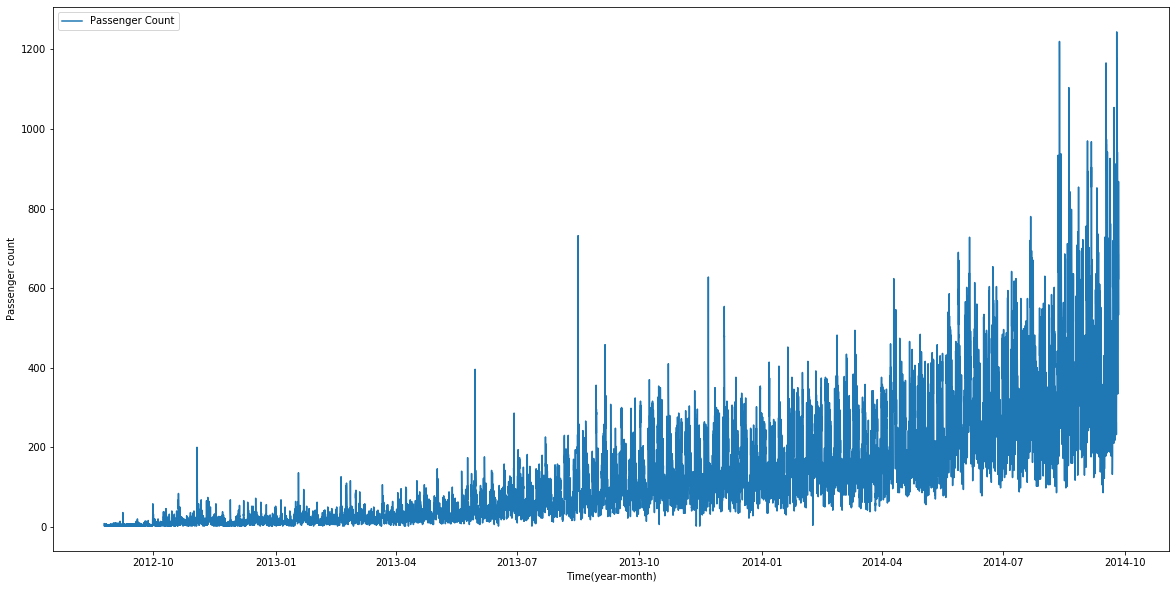

In [21]:
plt.figure(figsize=(20,10))
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.plot(train, label="Passenger Count")
plt.legend(loc=2)

# resample() method 'rule'
- per 5 minutes: resample('5T')
- per (1) hour: resample('1H') or resample('H')
- per (1) day: resample('D')
- per (1) week: resample('W')
- per (1) month: resample('M')
- per (1) year: resample('Y')

In [22]:
daily_train = train.resample('D').sum()
daily_train.head()

,Count
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60


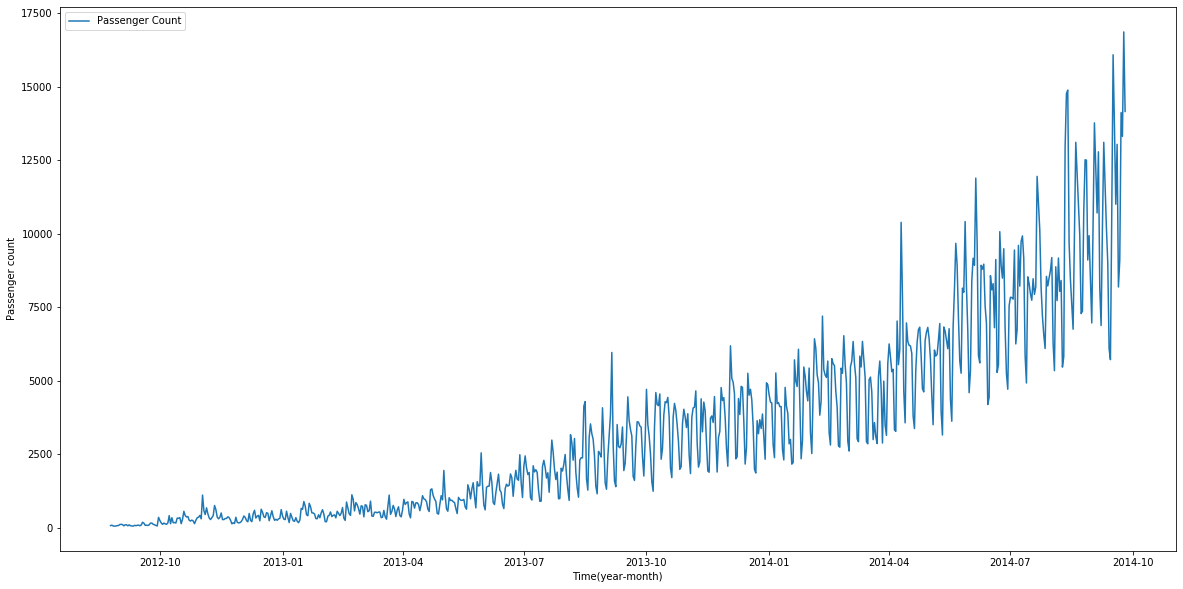

In [23]:
plt.figure(figsize=(20,10))
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.plot(daily_train, label="Passenger Count")
plt.legend(loc=2)

In [24]:
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count
daily_train.drop(['Count'], axis = 1, inplace = True)
daily_train.head()

,ds,y
Datetime,,
2012-08-25,2012-08-25,76
2012-08-26,2012-08-26,88
2012-08-27,2012-08-27,62
2012-08-28,2012-08-28,58
2012-08-29,2012-08-29,60


# Warning: PROPHET can get column names as y(target) and ds(datetime)

# Fit model

In [25]:
m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)
m.fit(daily_train)
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# 'forecast' is a dataframe

In [26]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-686.475171,-2165.188985,158.749566,-686.475171,-686.475171,-422.261377,-422.261377,-422.261377,-994.419741,-994.419741,-994.419741,572.158364,572.158364,572.158364,0.0,0.0,0.0,-1108.736549
1,2012-08-26,-678.372660,-2447.138097,-56.927389,-678.372660,-678.372660,-580.221416,-580.221416,-580.221416,-1143.373026,-1143.373026,-1143.373026,563.151610,563.151610,563.151610,0.0,0.0,0.0,-1258.594076
2,2012-08-27,-670.270149,-909.724369,1578.527610,-670.270149,-670.270149,1008.530371,1008.530371,1008.530371,457.243392,457.243392,457.243392,551.286980,551.286980,551.286980,0.0,0.0,0.0,338.260222
3,2012-08-28,-662.167638,-711.626722,1641.747397,-662.167638,-662.167638,1145.292015,1145.292015,1145.292015,607.917190,607.917190,607.917190,537.374825,537.374825,537.374825,0.0,0.0,0.0,483.124376
4,2012-08-29,-654.065127,-671.671329,1615.092833,-654.065127,-654.065127,1078.743296,1078.743296,1078.743296,556.498961,556.498961,556.498961,522.244335,522.244335,522.244335,0.0,0.0,0.0,424.678169


# Component analysis (jupyter has doubled graph problem)

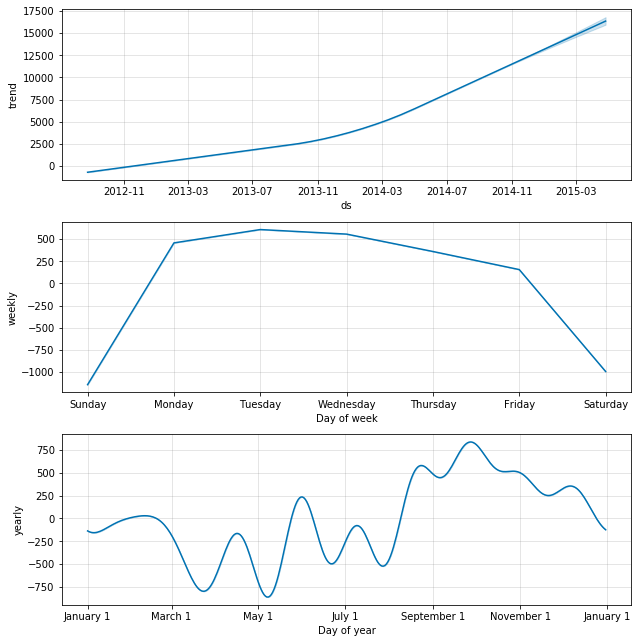

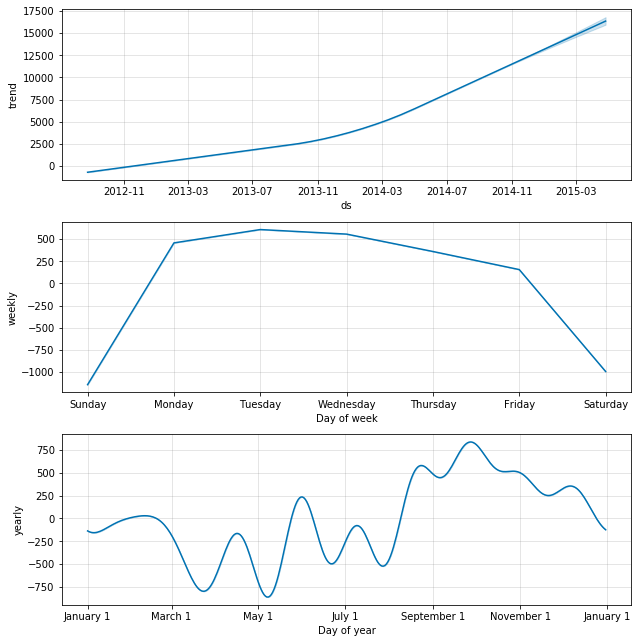

In [27]:
m.plot_components(forecast)

# Extract hour, day, month and year from both dataframes to merge
1. Change a column name from 'ds' to 'Datetime' in 'forecast' dataframe to batch work
2. Extract hour, day, month and year from both dataframes
3. Merge two dataframes(test, forecast)

In [28]:
forecast = forecast.rename(columns={'ds':'Datetime'})
forecast.head(2)

,Datetime,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-686.475171,-2165.188985,158.749566,-686.475171,-686.475171,-422.261377,-422.261377,-422.261377,-994.419741,-994.419741,-994.419741,572.158364,572.158364,572.158364,0.0,0.0,0.0,-1108.736549
1,2012-08-26,-678.372660,-2447.138097,-56.927389,-678.372660,-678.372660,-580.221416,-580.221416,-580.221416,-1143.373026,-1143.373026,-1143.373026,563.151610,563.151610,563.151610,0.0,0.0,0.0,-1258.594076


In [29]:
for df in [test, forecast]:
    df['hour'] = df['Datetime'].dt.hour
    df['day'] = df['Datetime'].dt.day
    df['month'] = df['Datetime'].dt.month
    df['year'] = df['Datetime'].dt.year

In [30]:
test.head()

,ID,Datetime,hour,day,month,year
0,18288,2014-09-26 00:00:00,0,26,9,2014
1,18289,2014-09-26 01:00:00,1,26,9,2014
2,18290,2014-09-26 02:00:00,2,26,9,2014
3,18291,2014-09-26 03:00:00,3,26,9,2014
4,18292,2014-09-26 04:00:00,4,26,9,2014


In [31]:
forecast.head()

,Datetime,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,...,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,hour,day,month,year
0,2012-08-25,-686.475171,-2165.188985,158.749566,-686.475171,-686.475171,-422.261377,-422.261377,-422.261377,-994.419741,...,572.158364,572.158364,0.0,0.0,0.0,-1108.736549,0,25,8,2012
1,2012-08-26,-678.372660,-2447.138097,-56.927389,-678.372660,-678.372660,-580.221416,-580.221416,-580.221416,-1143.373026,...,563.151610,563.151610,0.0,0.0,0.0,-1258.594076,0,26,8,2012
2,2012-08-27,-670.270149,-909.724369,1578.527610,-670.270149,-670.270149,1008.530371,1008.530371,1008.530371,457.243392,...,551.286980,551.286980,0.0,0.0,0.0,338.260222,0,27,8,2012
3,2012-08-28,-662.167638,-711.626722,1641.747397,-662.167638,-662.167638,1145.292015,1145.292015,1145.292015,607.917190,...,537.374825,537.374825,0.0,0.0,0.0,483.124376,0,28,8,2012
4,2012-08-29,-654.065127,-671.671329,1615.092833,-654.065127,-654.065127,1078.743296,1078.743296,1078.743296,556.498961,...,522.244335,522.244335,0.0,0.0,0.0,424.678169,0,29,8,2012


In [32]:
test = pd.merge(test,forecast, on=['hour','day','month','year'], how='left')
test.head()

,ID,Datetime_x,hour,day,month,year,Datetime_y,trend,yhat_lower,yhat_upper,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,18288,2014-09-26 00:00:00,0,26,9,2014,2014-09-26,10520.686919,10345.323761,12745.352572,...,155.993137,155.993137,155.993137,832.132392,832.132392,832.132392,0.0,0.0,0.0,11508.812447
1,18289,2014-09-26 01:00:00,1,26,9,2014,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18290,2014-09-26 02:00:00,2,26,9,2014,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18291,2014-09-26 03:00:00,3,26,9,2014,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18292,2014-09-26 04:00:00,4,26,9,2014,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Make new dataframe(has only ID, hour and yhat columns)

In [33]:
cols = ['ID','hour','yhat']
test_new = test[cols]
test_new.head()

,ID,hour,yhat
0,18288,0,11508.812447
1,18289,1,NaN
2,18290,2,NaN
3,18291,3,NaN
4,18292,4,NaN


# Merging hourly average fraction to the new test dataframe

In [34]:
test_new = pd.merge(test_new, hourly_frac, left_on = ['hour'], right_index=True, how = 'left')
test_new.head()

,ID,hour,yhat,fraction
0,18288,0,11508.812447,0.044287
1,18289,1,NaN,0.035343
2,18290,2,NaN,0.029911
3,18291,3,NaN,0.024714
4,18292,4,NaN,0.020802


# Convert daily aggregate to hourly traffic

In [35]:
test_new.fillna(method='ffill', inplace=True)
test_new.head(26)

,ID,hour,yhat,fraction
0,18288,0,11508.812447,0.044287
1,18289,1,11508.812447,0.035343
2,18290,2,11508.812447,0.029911
3,18291,3,11508.812447,0.024714
4,18292,4,11508.812447,0.020802
5,18293,5,11508.812447,0.018621
6,18294,6,11508.812447,0.020023
7,18295,7,11508.812447,0.023221
8,18296,8,11508.812447,0.026741
9,18297,9,11508.812447,0.034555


In [36]:
test_new['Count'] = test_new['yhat'] * test_new['fraction']
test_new.head()

,ID,hour,yhat,fraction,Count
0,18288,0,11508.812447,0.044287,509.686034
1,18289,1,11508.812447,0.035343,406.756120
2,18290,2,11508.812447,0.029911,344.240962
3,18291,3,11508.812447,0.024714,284.434008
4,18292,4,11508.812447,0.020802,239.408964


In [37]:
test_new.loc[:23, 'Count'].sum()

11508.812447435374

In [38]:
test_new.drop(['yhat','fraction','hour'],axis = 1, inplace = True)
test_new.head()

,ID,Count
0,18288,509.686034
1,18289,406.756120
2,18290,344.240962
3,18291,284.434008
4,18292,239.408964


# Save file

In [39]:
test_new.to_csv('prophet_sub.csv',index = False)

# Make forecast graph
- Change a column name frome 'Datetime' to 'ds' because PROPHET can get only 'ds' and 'y.'

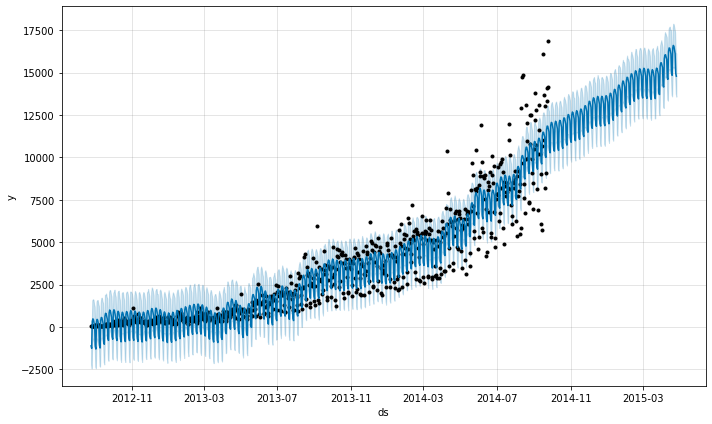

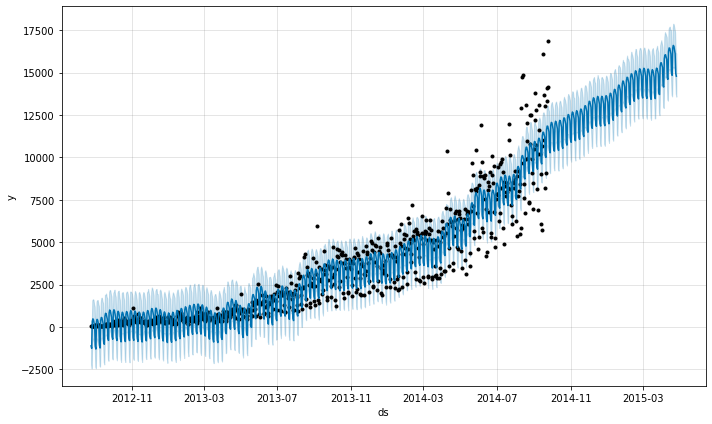

In [40]:
forecast = forecast.rename(columns={'Datetime':'ds'})
m.plot(forecast)